# ASSIGNMENT 4

## a) Loading necessary libraries and data sets

In [3]:
# Loading the neccesary libraries into working environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression


In [5]:

# Loading the datasets into working environment
train = pd.read_csv("train.csv")
test = pd.read_csv( "test.csv")


In [6]:
# Getting the total number of rows and columns
print("Training data shape:",train.shape)
print("Testing data shape:",test.shape)


Training data shape: (891, 12)
Testing data shape: (418, 11)


In [7]:

# Printing the first five rows of the train dataset
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## b. Detect missing values numerically

In [8]:
#Detecting the missing values
def missing_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values',1:'% of Total Values', 2 : 'Data Type'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
      

In [9]:

# Missing values in train datazset
train_missing = missing_values_table(train)
train_missing


Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [10]:

# Missing values in test dataset
test_missing = missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


## c. Detect missing values visually using missingno library

In [11]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

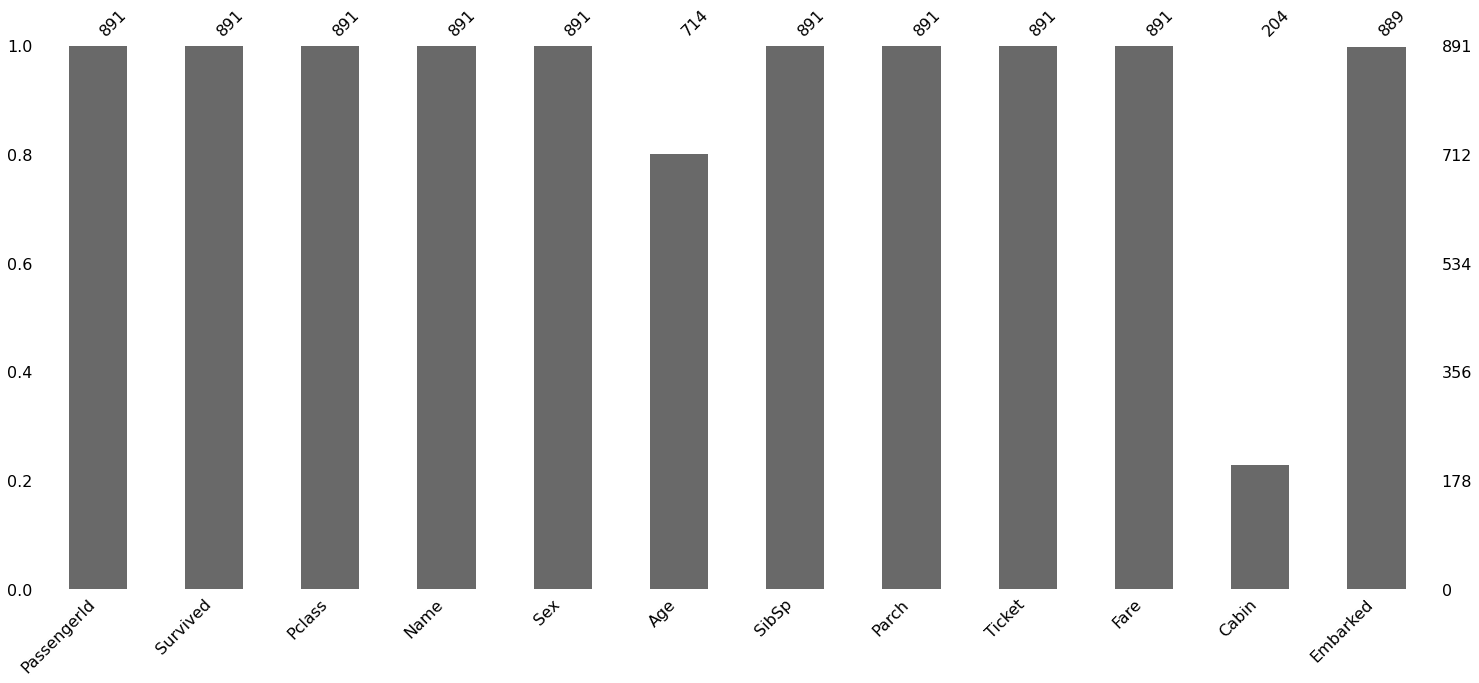

In [12]:
 
import missingno as msno
msno.bar(train)



<AxesSubplot:>

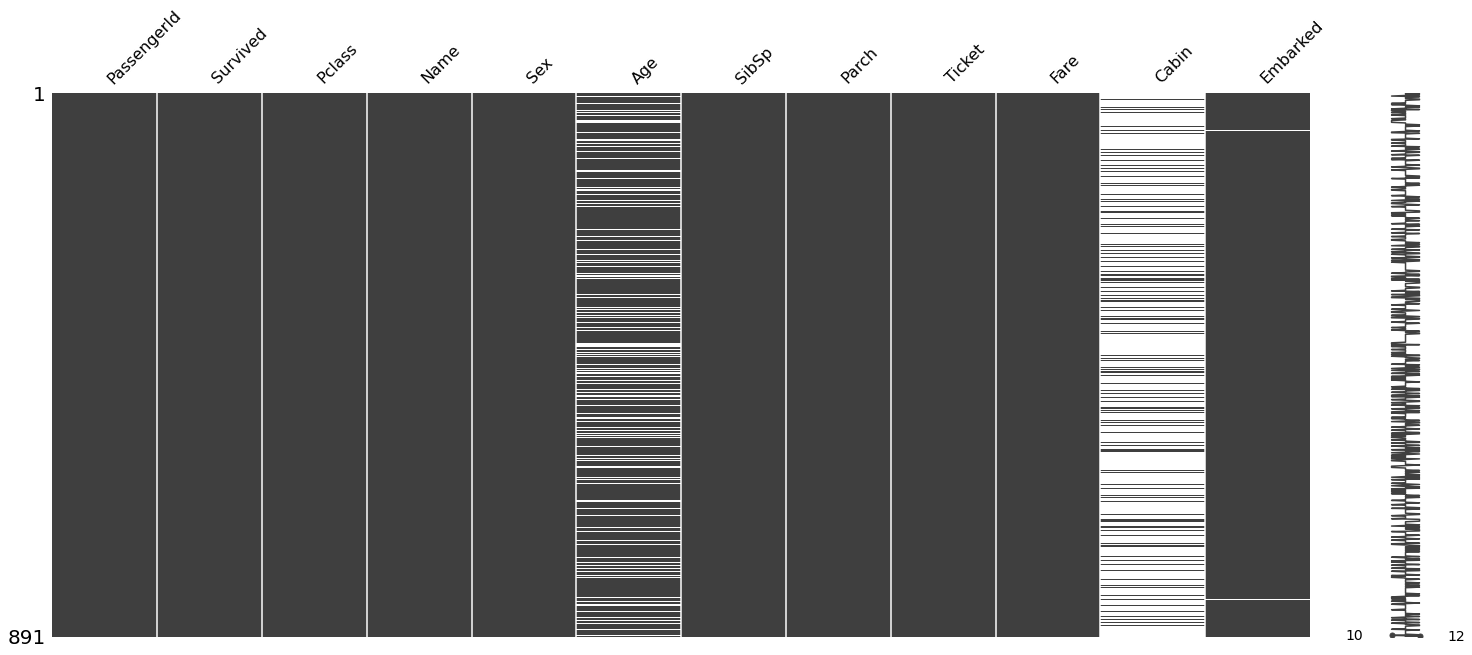

In [13]:

# Visualizing the locations of missing values
msno.matrix(train)


<AxesSubplot:>

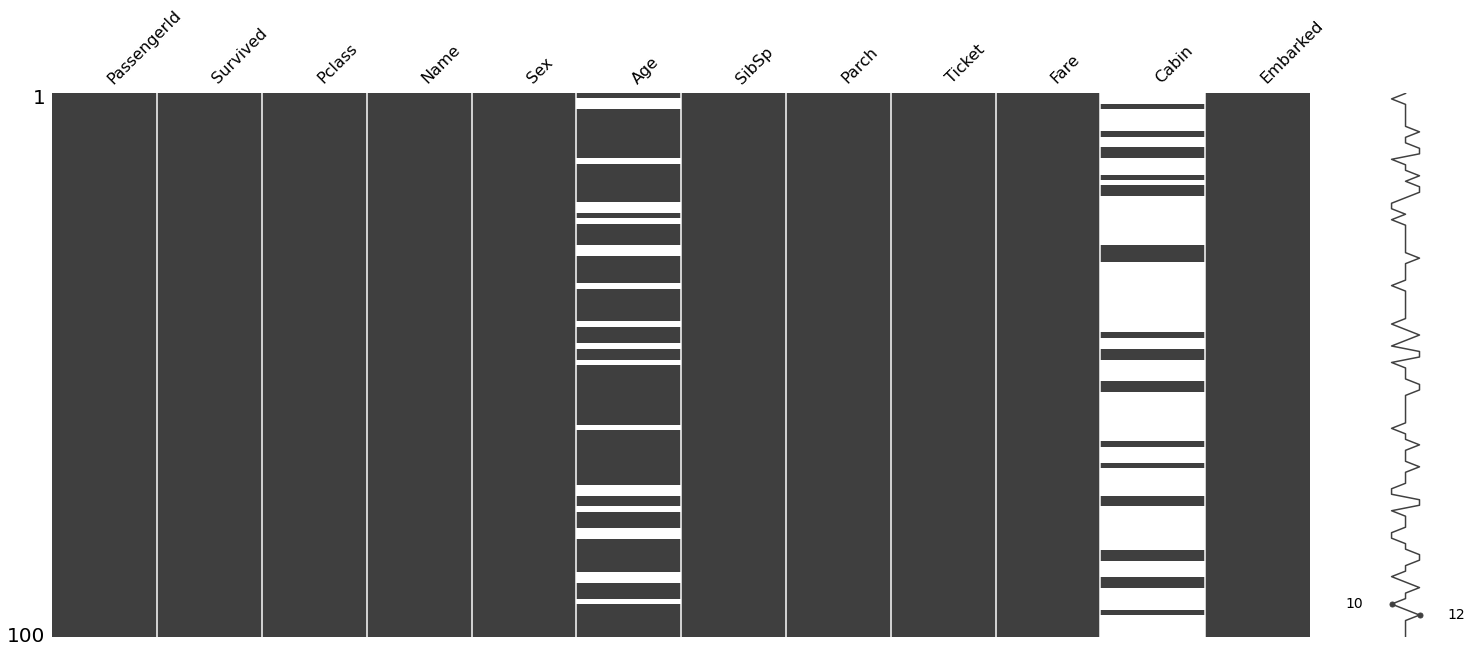

In [14]:
# Taking only the first 100 rows
msno.matrix(train.sample(100))

## d. Find reasons for missing values using matrix plot, heap map anddendrogram


<AxesSubplot:>

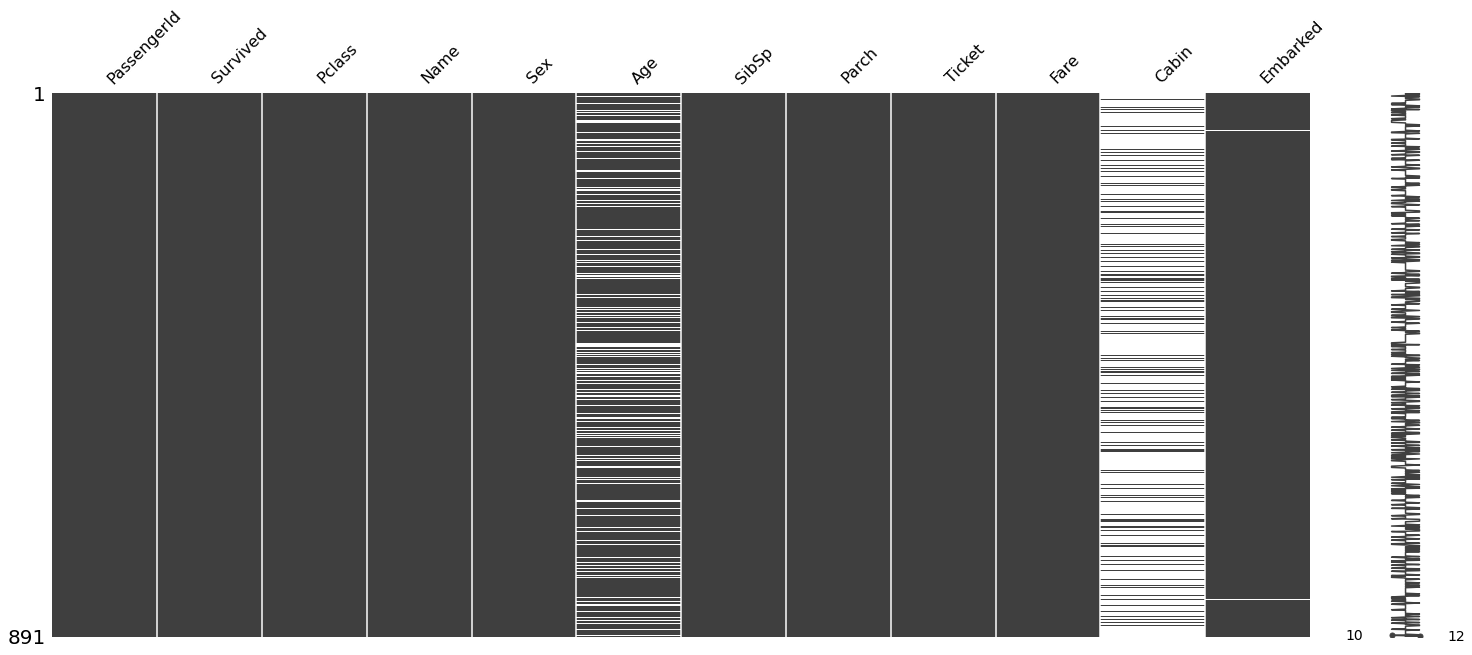

In [15]:

# Use matrix plot
msno.matrix(train)



<AxesSubplot:>

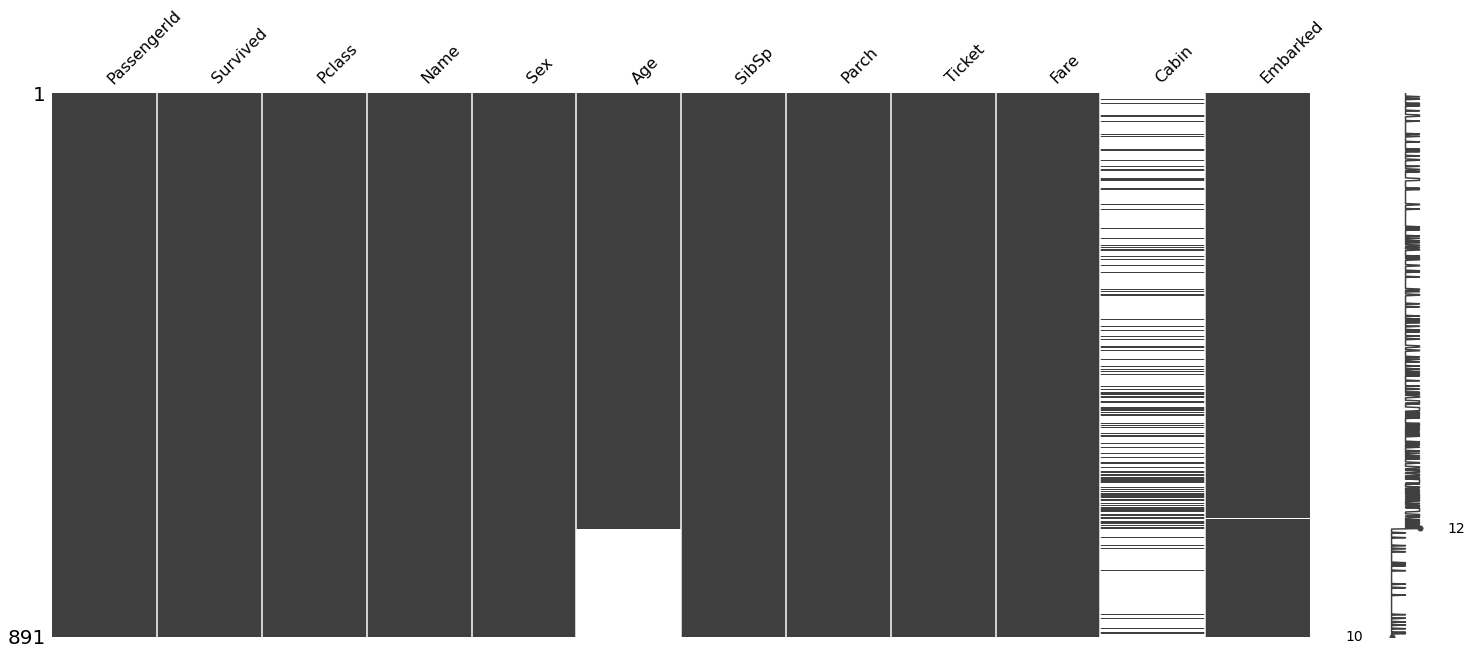

In [16]:

# Sorted by 'Age'
sorted = train.sort_values('Age')
msno.matrix(sorted)

<AxesSubplot:>

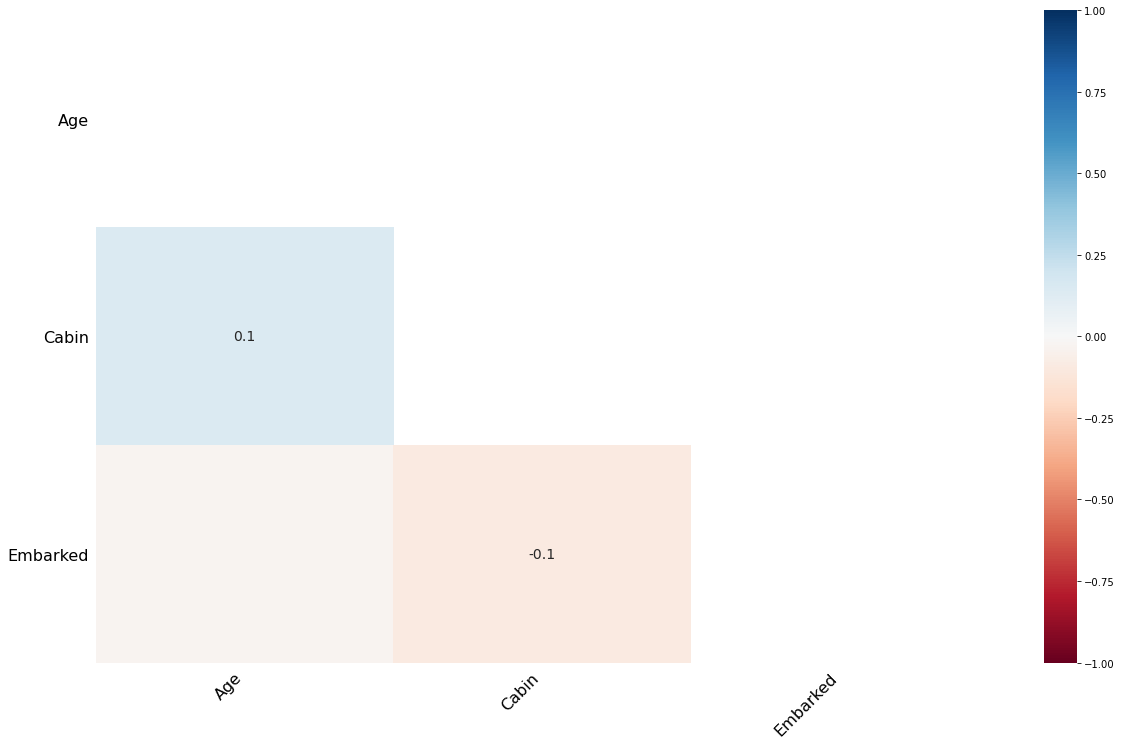

In [17]:

# Finding reason for missing data using heatmap
msno.heatmap(train)


<AxesSubplot:>

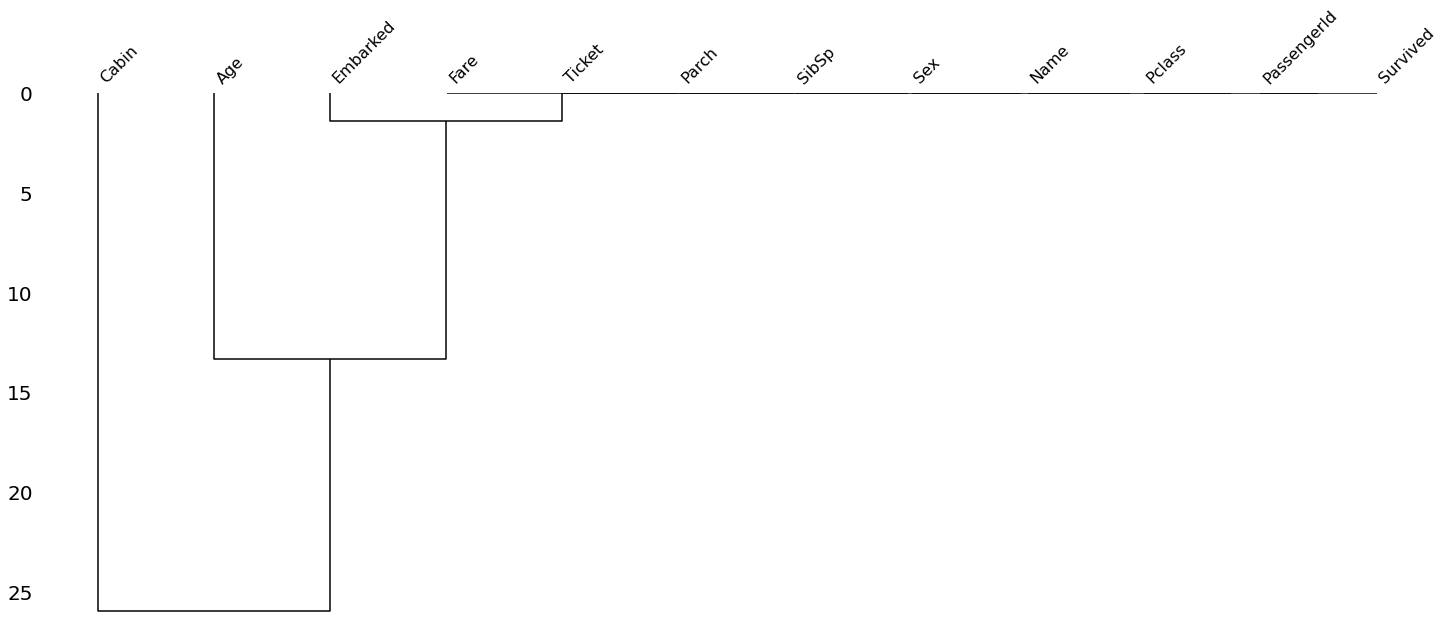

In [18]:
#Finding reasons for missing data using dendrogram
msno.dendrogram(train)

## e. Treat missing values (deletions, imputing for non time series data,imputing for (Time series data)

In [19]:

# Get total number of missing values
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:

# pairwise deletion
train_1= train.copy()
train_1['Age'].mean()

29.69911764705882

In [21]:

# Dropping the rows with missing values
train_1.dropna(subset=['Age'],how='any',inplace = True)
train_1['Age'].isnull().sum()


0

In [22]:

# Imputing by constant
from sklearn.impute import SimpleImputer
train_constant = train.copy()
mean_imputer = SimpleImputer(strategy='constant')
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:

# Imputing by most frequent value
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:

city_day = pd.read_csv('city_day.csv')
city_day1 = city_day.copy(deep=False)
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [26]:
# Missing values
city_day_missing = missing_values_table(city_day)
city_day_missing

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [27]:

# Imputing Xylene value
city_day['Xylene'][50:64]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
Name: Xylene, dtype: float64

In [28]:

# Imputing by ffill
city_day.fillna(method= 'ffill',inplace=True)
city_day['Xylene'][50:65]


50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
Name: Xylene, dtype: float64

In [29]:

# Imputing using bfill
city_day['AQI'][20:30]


20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28    209.0
29    328.0
Name: AQI, dtype: float64

In [30]:

city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

20    209.0
21    209.0
22    209.0
23    209.0
24    209.0
25    209.0
26    209.0
27    209.0
28    209.0
29    328.0
Name: AQI, dtype: float64